In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from imblearn.combine import *
from sklearn.metrics import *

In [69]:
df = pd.read_csv("train.csv")
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29195,172762.0,-0.725459,0.194981,-1.785571,-3.779860,2.177420,2.975713,-0.239695,0.912303,-3.159994,...,0.046103,0.102480,-0.461027,0.717647,1.253036,0.207138,-0.630549,-0.163911,7.00,0
29196,172764.0,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,...,0.003530,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,80.00,0
29197,172767.0,-0.268061,2.540315,-1.400915,4.846661,0.639105,0.186479,-0.045911,0.936448,-2.419986,...,-0.263889,-0.857904,0.235172,-0.681794,-0.668894,0.044657,-0.066751,-0.072447,12.82,0
29198,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
29199,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [46]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [47]:
columns = list(df.columns)[1:30] # except time, class

plt.figure(figsize = (7, 4*28))
for idx, column in enumerate(columns):
    plt.subplot(29, 1, idx+1)
    sns.distplot(df[df["Class"] == 0][column], bins = 50, label = "Normal")
    sns.distplot(df[df["Class"] == 1][column], bins = 50, label = "Fraud")
    plt.title(str(column) + "'s Histogram")
    plt.legend()
    
plt.tight_layout()    
plt.show()

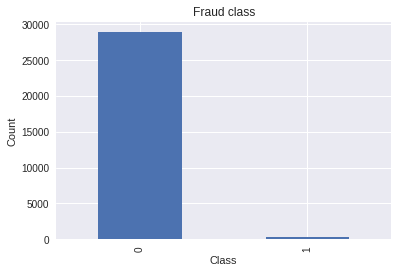

The total counts of each class are  28908 for class 0 and  292  for class 1


In [48]:
count_classes = pd.value_counts(df.Class)
count_classes.plot(kind = 'bar')
plt.title("Fraud class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
print("The total counts of each class are ", count_classes[0], "for class 0 and ", count_classes[1]," for class 1")

In [74]:
def preprocessing(df):
    df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)
    df['scaledAmount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
    scaled_df = df.copy()
    preproceesed_df = scaled_df.drop(['Time', 'Amount'], axis = 1)
    return preproceesed_df
    
preproceesed_df = preprocessing(df)

In [77]:
X_train, y_train = X, y = preproceesed_df.drop("Class", axis = 1), preproceesed_df.Class

# validation set preparation

In [78]:
val_df = pd.read_csv("valid.csv")
preprocessed_val_df = preprocessing(val_df)

In [79]:
X_val, y_val = X, y = preprocessed_val_df.drop("Class", axis = 1), preprocessed_val_df.Class

# Learning

In [80]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
clf_rf = RandomForestClassifier(n_estimators=25, random_state=0)
clf_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [92]:
print('Validation Results')
print(clf_rf.score(X_val, y_val))
print(recall_score(y_val, clf_rf.predict(X_val)))
print(precision_score(y_val, clf_rf.predict(X_val)))
print(f1_score(y_val, clf_rf.predict(X_val)))

#print('\nTest Results')
#print(clf_rf.score(test_features, test_target))
#print(recall_score(test_target, clf_rf.predict(test_features)))

Validation Results
0.9972
0.81
0.9
0.852631578947
